In [1]:
#hide
![ -e ./ ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from fastbook import *

In [3]:
from PIL import Image

# img = Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/58 (1).jpg")

**Stroke detection**

In [4]:
import glob
import pandas as pd
import numpy as np
from fastbook import *

# normal_imgs = glob.glob("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal/*")
# stroke_imgs = glob.glob("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/*")


In [5]:
!wget 'https://cdn.discordapp.com/attachments/758930272711868416/1106591659103354930/test_stroke.csv'
!wget 'https://cdn.discordapp.com/attachments/758930272711868416/1106591659610882078/train_stroke.csv'

--2023-06-15 06:05:42--  https://cdn.discordapp.com/attachments/758930272711868416/1106591659103354930/test_stroke.csv
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.130.233, 162.159.135.233, 162.159.134.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.130.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21620 (21K) [text/csv]
Saving to: ‘test_stroke.csv’

test_stroke.csv     100%[===================>]  21.11K  --.-KB/s    in 0.001s  

2023-06-15 06:05:42 (40.8 MB/s) - ‘test_stroke.csv’ saved [21620/21620]

--2023-06-15 06:05:43--  https://cdn.discordapp.com/attachments/758930272711868416/1106591659610882078/train_stroke.csv
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.135.233, 162.159.133.233, 162.159.130.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.135.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193703 (189K) [text/csv]
Saving to: ‘train_stroke.

In [6]:
# train_df.to_csv("train_stroke.csv",index=False)
# test_df.to_csv("test_stroke.csv",index=False)
train_df = pd.read_csv("/kaggle/working/train_stroke.csv")
test_df = pd.read_csv("/kaggle/working/test_stroke.csv")

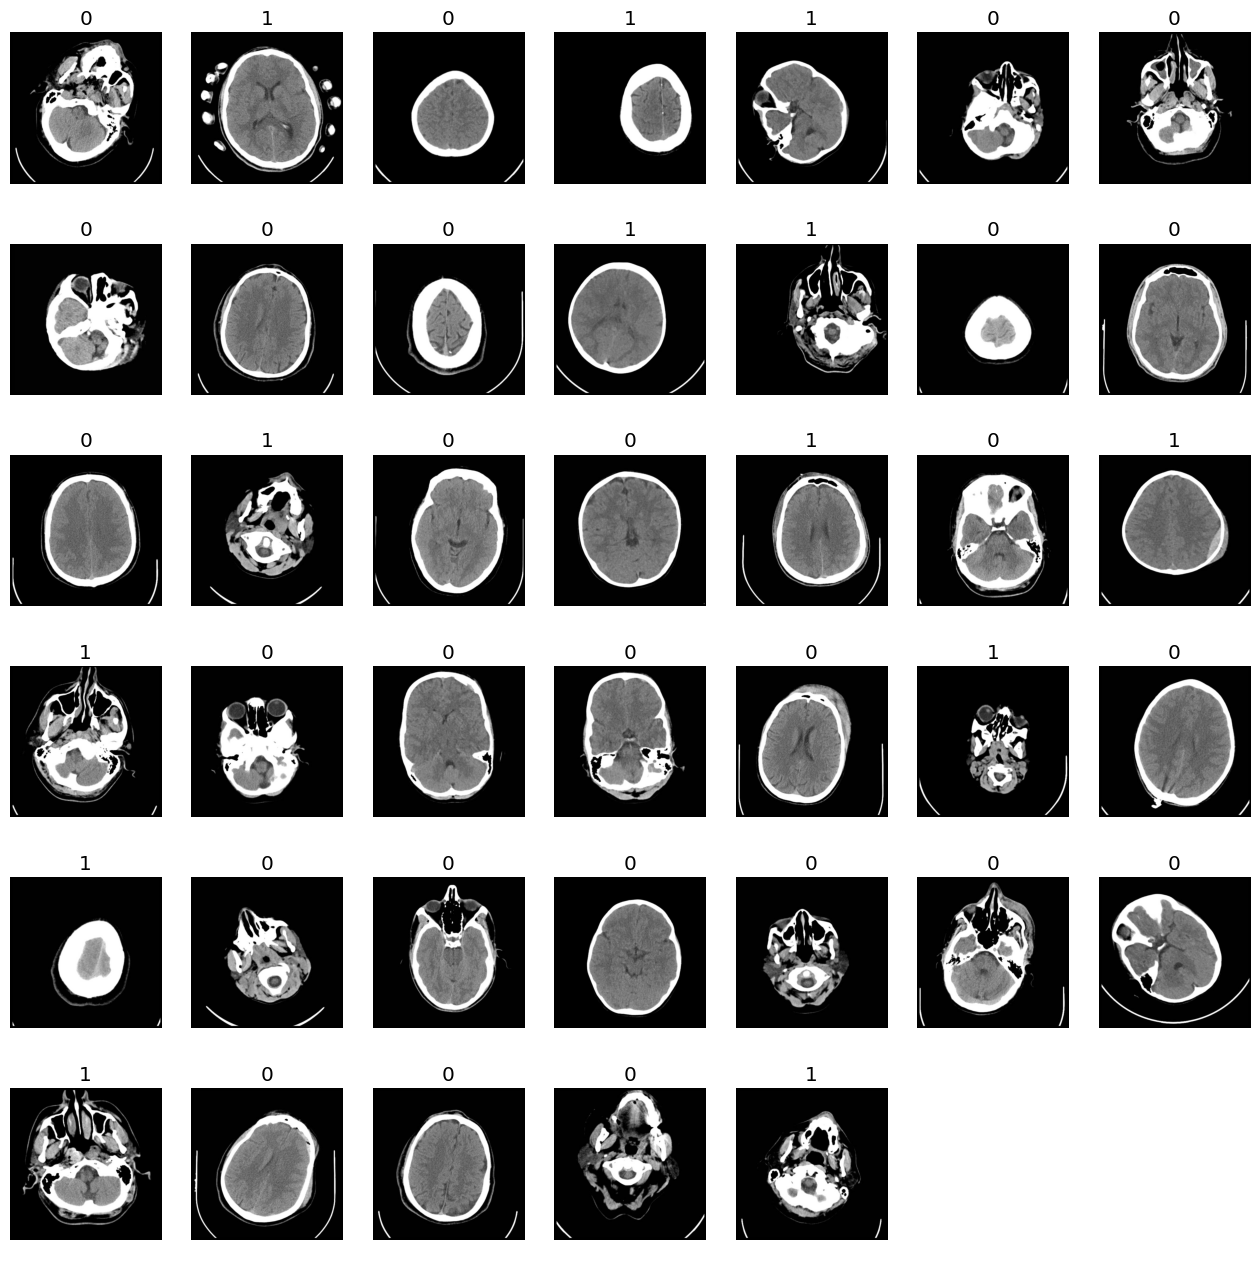

In [7]:
from fastai.vision.data import ImageDataLoaders
np.random.seed(42)
data = ImageDataLoaders.from_df(train_df,
        '/', 
        fn_col='name',
        label_col='label',
        size=224,
        valid_pct=0.1,
        num_workers=4
    )
data.show_batch(max_n=40,figsize=(16,16))

In [8]:
from fastai.metrics import Recall,Precision,F1Score,accuracy,error_rate
recall = Recall()
presc = Precision()
f1score = F1Score()

In [9]:
from fastai.vision.learner import cnn_learner , models,vision_learner
learn = vision_learner(data, models.resnet18, metrics=[accuracy,error_rate,recall,presc,f1score])

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]


In [10]:
learn.fit(10)

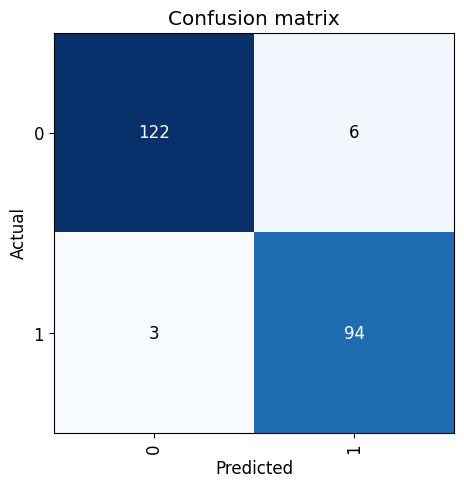

In [11]:
from fastai.interpret import ClassificationInterpretation,Interpretation

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

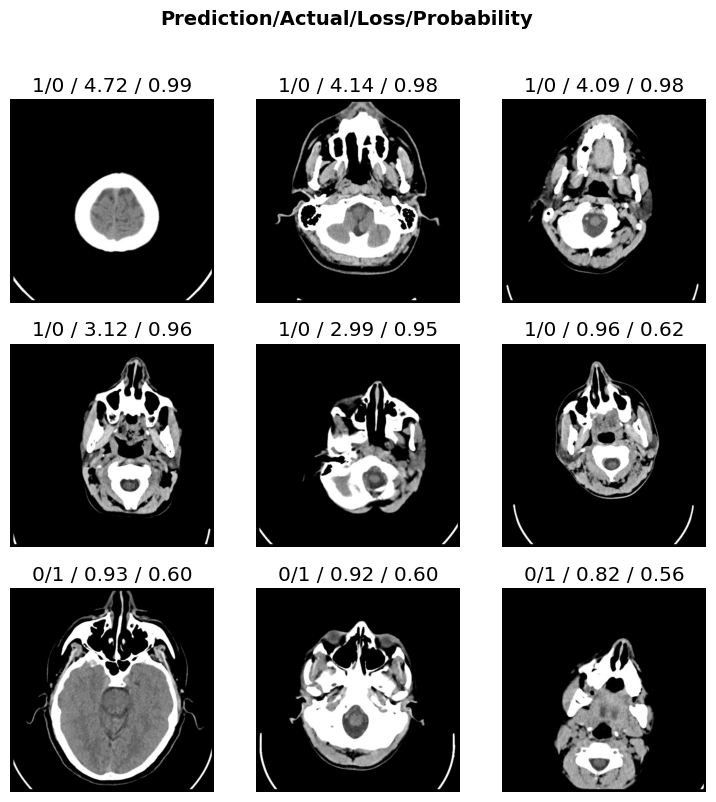

In [12]:
# from fastai.vision.learner import Interpretation

interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

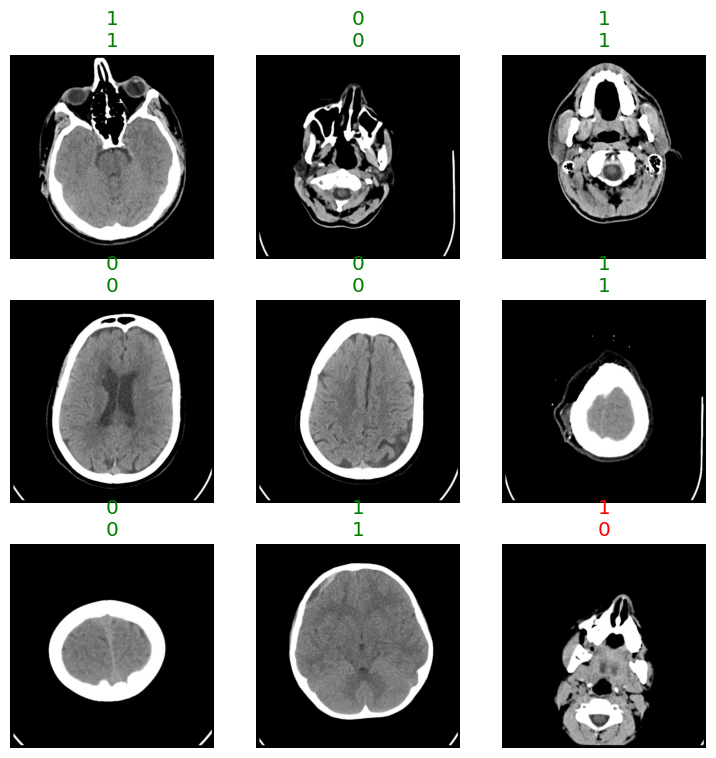

In [13]:
learn.show_results()


In [14]:
#DCNN

# DCNN

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


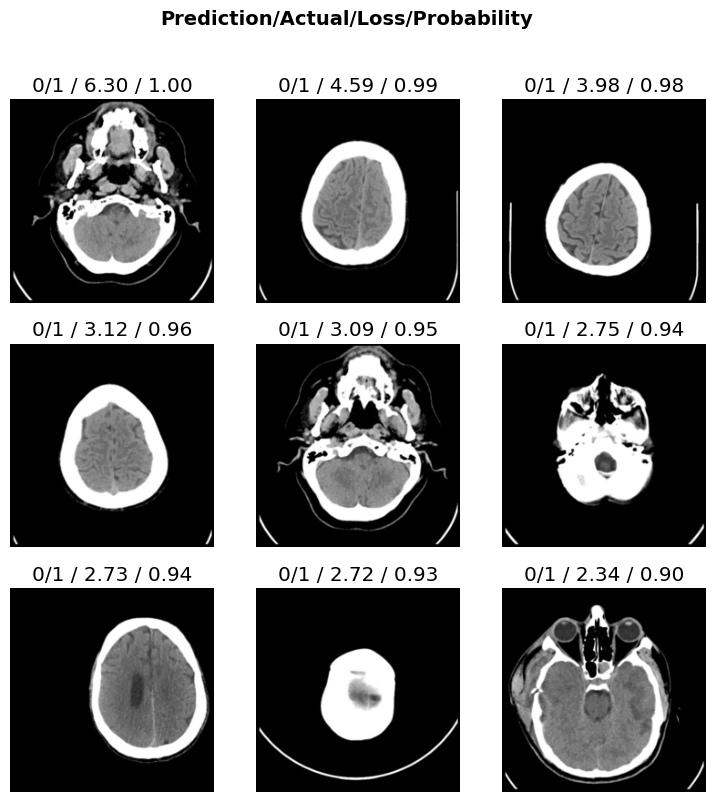

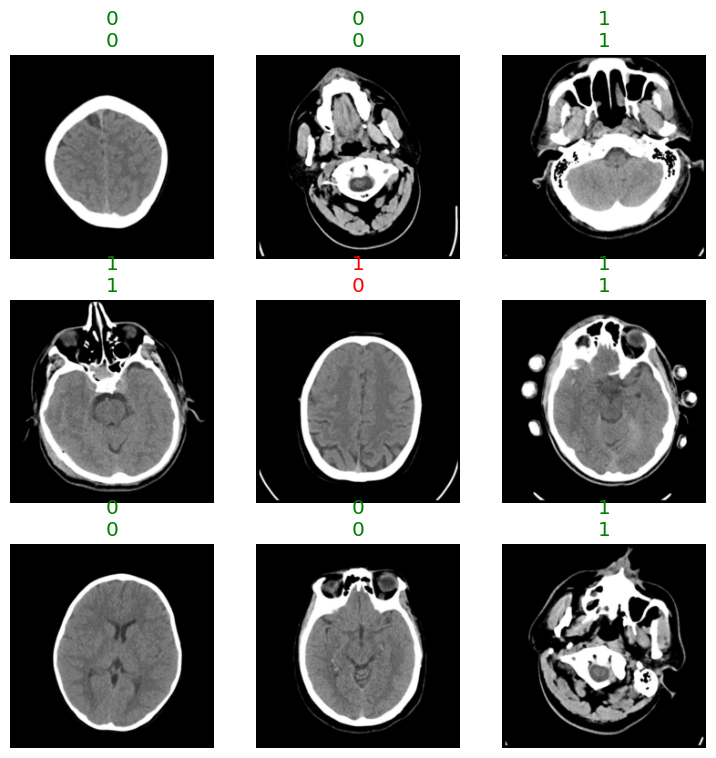

In [15]:
from fastai.vision.all import *

train_df = pd.read_csv("/kaggle/working/train_stroke.csv")
test_df = pd.read_csv("/kaggle/working/test_stroke.csv")

data = ImageDataLoaders.from_df(train_df,
        '/',
        fn_col='name',
        label_col='label',
        item_tfms=Resize(224),
        batch_tfms=aug_transforms(),
        valid_pct=0.1,
        num_workers=4
    )
metrics=[accuracy, error_rate, recall, presc, f1score]


learn = cnn_learner(data, models.resnet18, metrics=metrics)
learn.fit_one_cycle(10)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)
learn.show_results()



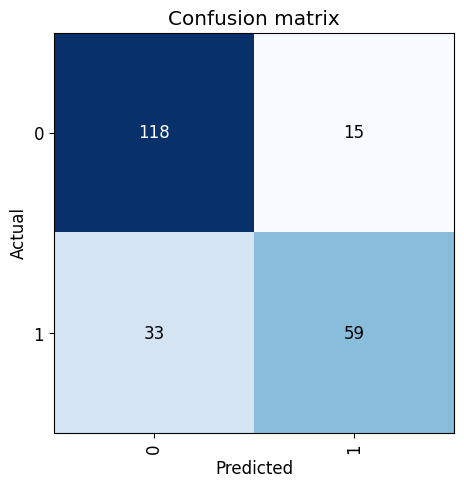

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()



              precision    recall  f1-score   support

           0       0.78      0.89      0.83       133
           1       0.80      0.64      0.71        92

    accuracy                           0.79       225
   macro avg       0.79      0.76      0.77       225
weighted avg       0.79      0.79      0.78       225



# VGG16

In [18]:
from fastai.vision.all import *

train_df = pd.read_csv("/kaggle/working/train_stroke.csv")
test_df = pd.read_csv("/kaggle/working/test_stroke.csv")

data = ImageDataLoaders.from_df(train_df,
                               '/',
                               fn_col='name',
                               label_col='label',
                               item_tfms=Resize(224),
                               batch_tfms=aug_transforms(),
                               valid_pct=0.1,
                               num_workers=4)

metrics = [accuracy, error_rate, recall, presc, f1score]

learn = cnn_learner(data, models.vgg16_bn, metrics=metrics)

learn.fit_one_cycle(10)

interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()


/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       138
           1       0.85      0.77      0.81        87

    accuracy                           0.86       225
   macro avg       0.86      0.84      0.85       225
weighted avg       0.86      0.86      0.86       225



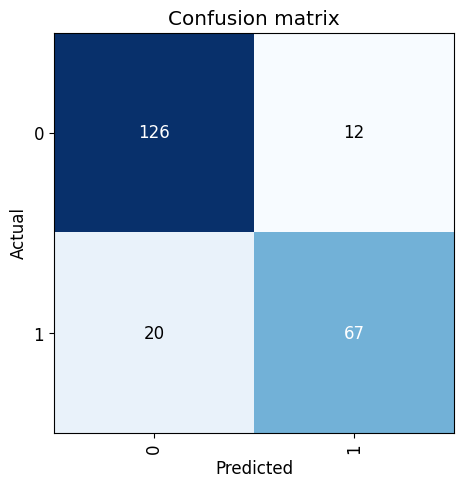

In [19]:
interp.plot_confusion_matrix()


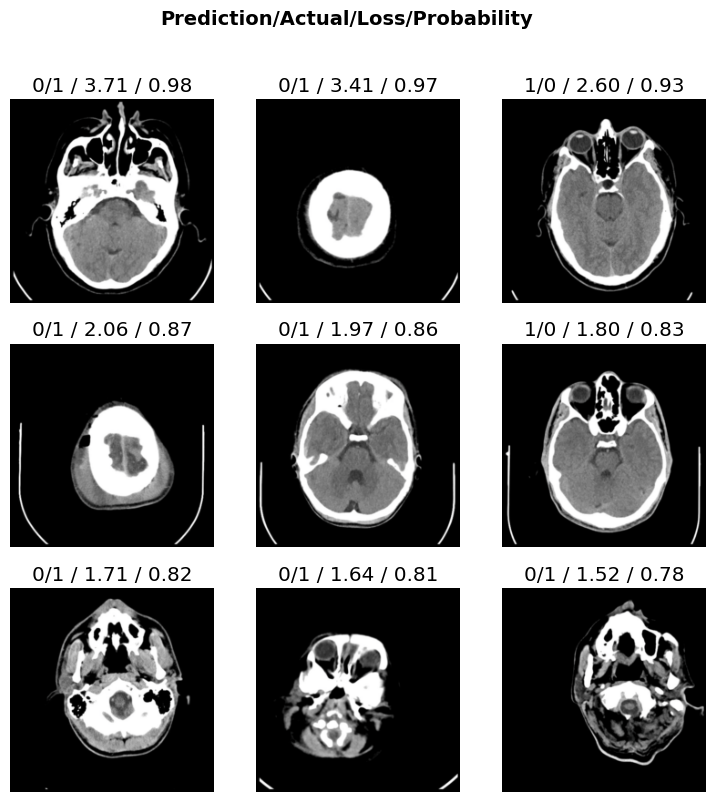

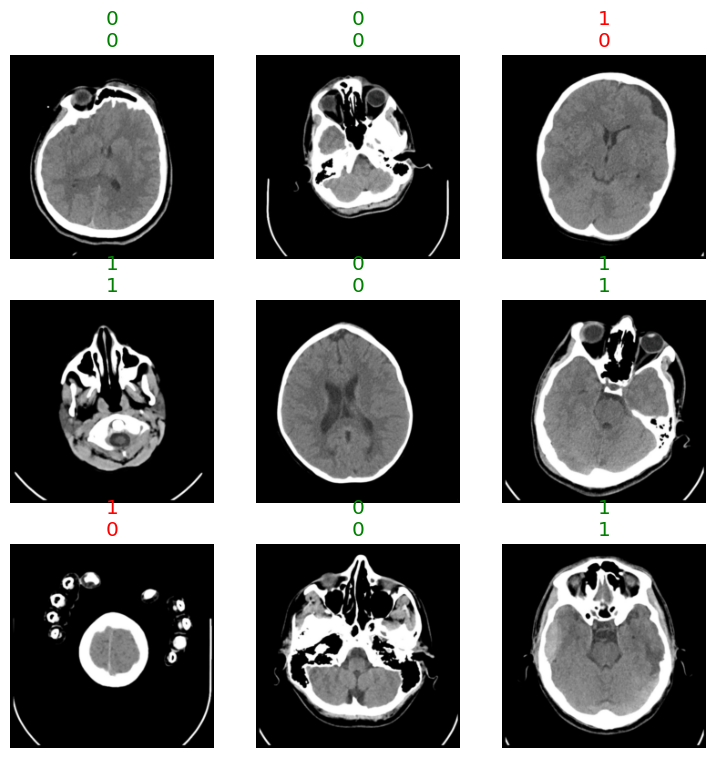

In [20]:
interp.plot_top_losses(9)
learn.show_results()


# ResNet50

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.86      0.73      0.79        95

    accuracy                           0.84       225
   macro avg       0.84      0.82      0.83       225
weighted avg       0.84      0.84      0.83       225



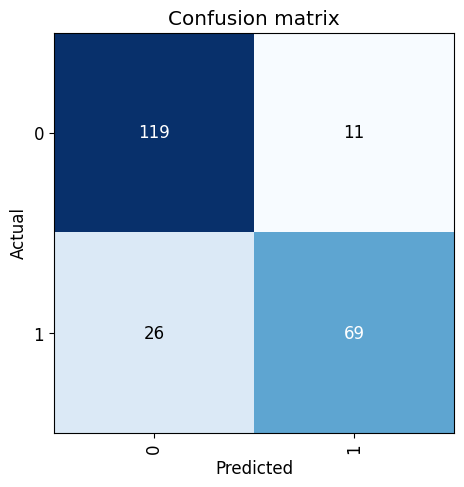

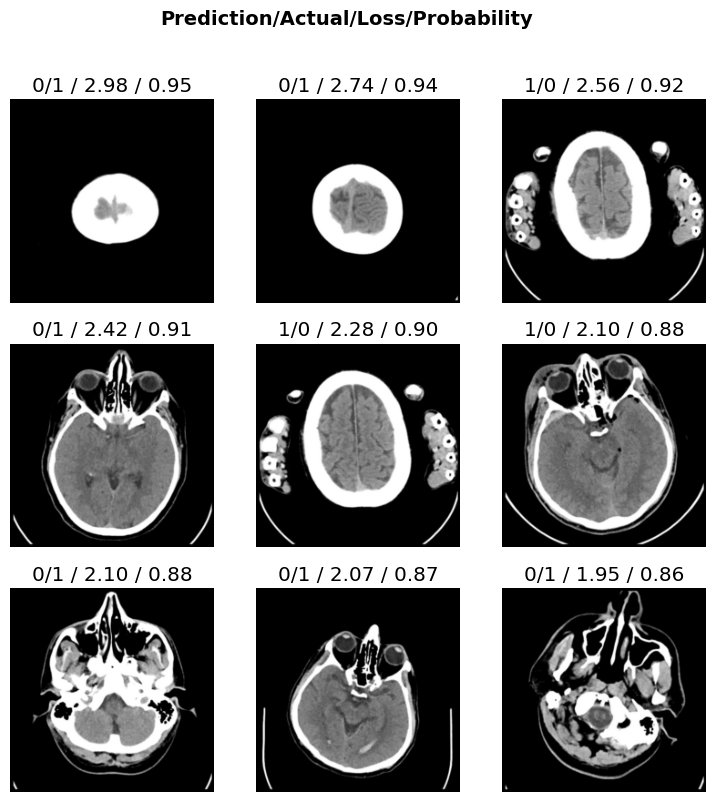

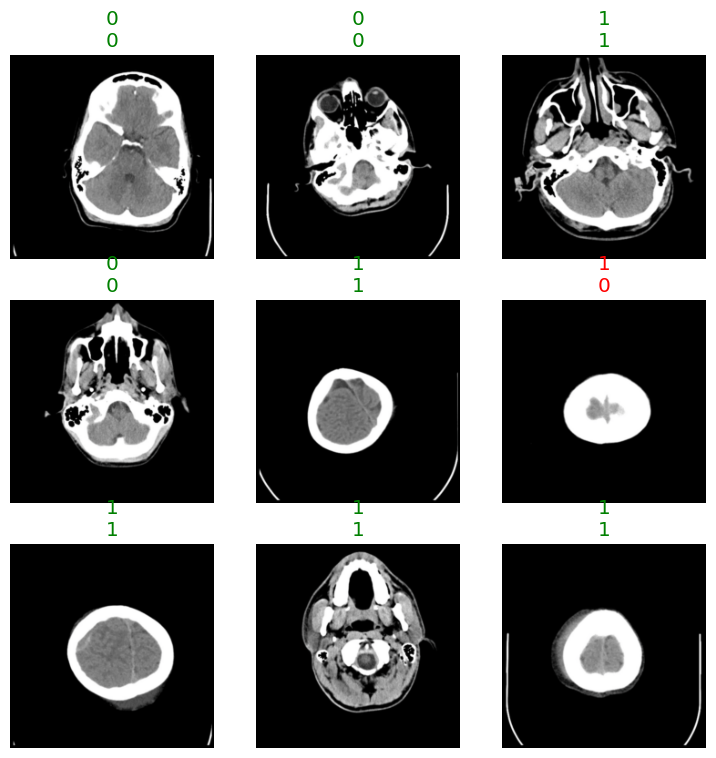

In [21]:
from fastai.vision.all import *

train_df = pd.read_csv("/kaggle/working/train_stroke.csv")
test_df = pd.read_csv("/kaggle/working/test_stroke.csv")

data = ImageDataLoaders.from_df(train_df,
                               '/',
                               fn_col='name',
                               label_col='label',
                               item_tfms=Resize(224),
                               batch_tfms=aug_transforms(),
                               valid_pct=0.1,
                               num_workers=4)

metrics = [accuracy, error_rate, recall, presc, f1score]

learn = cnn_learner(data, models.resnet50, metrics=metrics)

learn.fit_one_cycle(10)

interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()


interp.plot_confusion_matrix()

interp.plot_top_losses(9)
learn.show_results()


# Incpetion v3

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


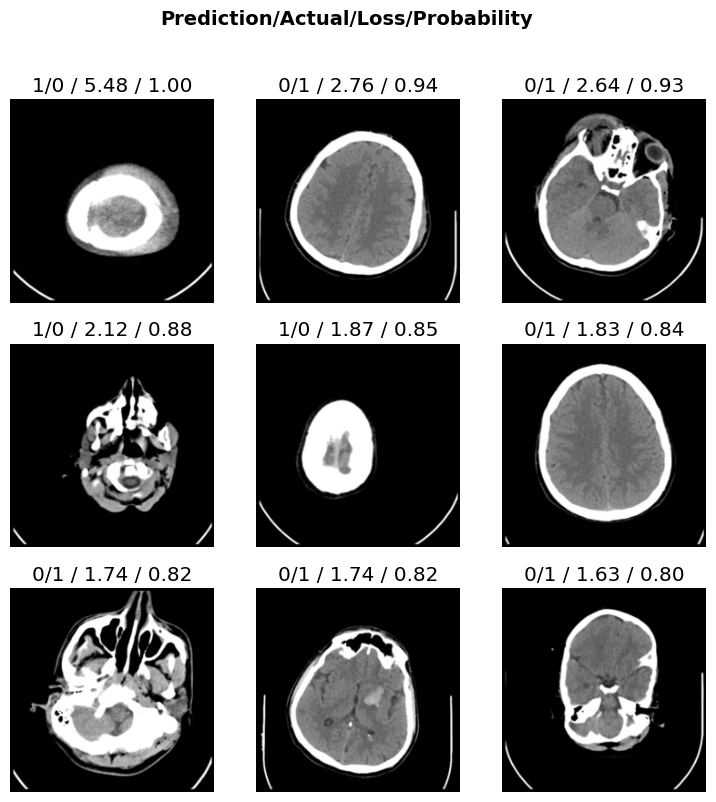

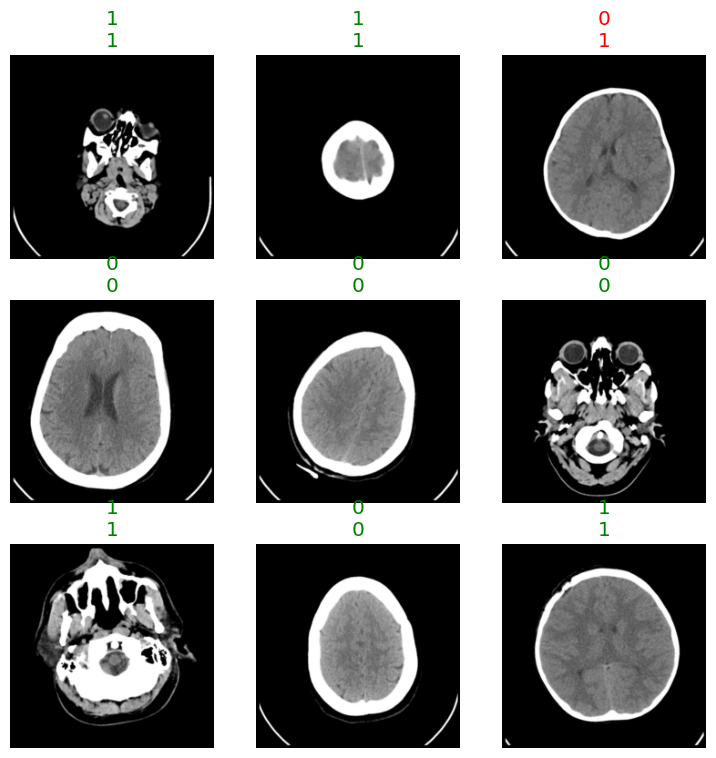

In [22]:
from fastai.vision.all import *

train_df = pd.read_csv("/kaggle/working/train_stroke.csv")
test_df = pd.read_csv("/kaggle/working/test_stroke.csv")

data = ImageDataLoaders.from_df(train_df,
        '/',
        fn_col='name',
        label_col='label',
        item_tfms=Resize(224),
        batch_tfms=aug_transforms(),
        valid_pct=0.1,
        num_workers=4
    )
metrics=[accuracy, error_rate, recall, presc, f1score]


learn = cnn_learner(data, models.resnet18, metrics=metrics)
learn.fit_one_cycle(10)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)
learn.show_results()



In [23]:
import matplotlib.pyplot as plt

losses_dcnn = learn_dcnn.recorder.losses
losses_vgg16 = learn_vgg16.recorder.losses
losses_resnet50 = learn_resnet50.recorder.losses
losses_resnet50 = learn_resnet50.recorder.losses

epochs = range(1, len(losses_dcnn) + 1)

plt.plot(epochs, losses_dcnn, label='DCNN')
plt.plot(epochs, losses_vgg16, label='VGG16')
plt.plot(epochs, losses_resnet50, label='ResNet50')
plt.plot(epochs, losses_resnet50, label='Inceptionv3')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve of Each Model')
plt.legend()
plt.show()


NameError: name 'learn_dcnn' is not defined